In [1]:
import sympy
from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor

from einsteinpy.symbolic.christoffel import ChristoffelSymbols

sympy.init_printing()

In [2]:
# Setup a metric tensor (Guidry problem 7.5)

syms = sympy.symbols("t r theta phi rho")
t, r, th, ph, rho = syms
m = sympy.diag(-1, 1, r ** 2 + rho**2,  (r ** 2 + rho**2)*sin(th)**2 ).tolist()
metric = MetricTensor(m, syms[0:4])

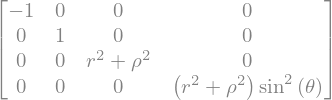

In [3]:
metric.tensor()

In [4]:
# Compute the Christoffel Symbols

cs = ChristoffelSymbols.from_metric(metric)

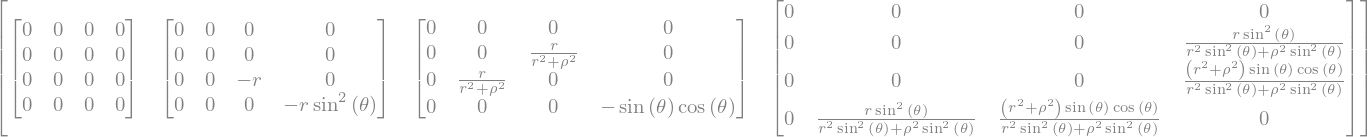

In [5]:
cs.tensor()

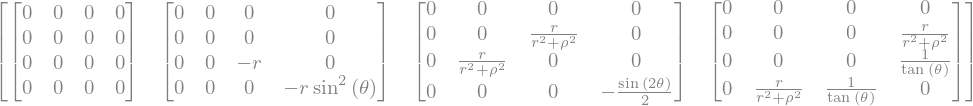

In [6]:
# Note that some expressions can be simplified, so let's do it

from sympy import simplify

simplify(cs.tensor())

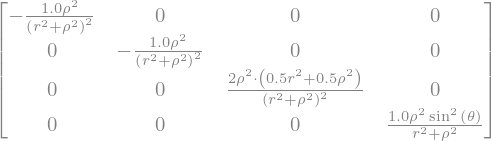

In [7]:
# Comput the Einstein tensor

EinsteinTensor.from_metric(metric).tensor()

In [8]:
# Now set up an oscillating universe (Guidry 7.6)

syms = sympy.symbols("t r theta phi")
t, r, th, ph = syms
m = sympy.diag(-1, sin(t)**2, sin(t)**2, sin(t)**2 ).tolist()
metric = MetricTensor(m, syms)

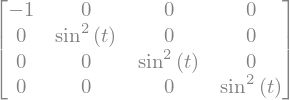

In [9]:
metric.tensor()

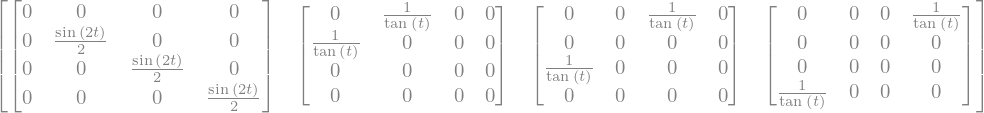

In [10]:
simplify(ChristoffelSymbols.from_metric(metric).tensor())

## Schwarzschild embedding visualization

In [11]:
from einsteinpy.hypersurface import SchwarzschildEmbedding
from einsteinpy.plotting import HypersurfacePlotter
from astropy import units as u

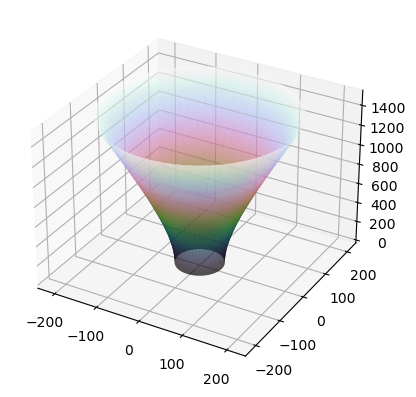

In [12]:
# Declaring embedding object with specified mass of the body and plotting the embedding hypersurface for Schwarzschild spacetime
surface_obj = SchwarzschildEmbedding(10e23 * u.kg)
surface = HypersurfacePlotter(embedding=surface_obj, plot_type='surface')
surface.plot()
surface.show()